# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('drive/MyDrive/train.csv')

In [12]:
data.shape

(733271, 112)

In [13]:
print(data.dtypes.value_counts())
print(data.memory_usage(deep=True).sum() / 1024**2, "MB")

int64      93
float64    19
Name: count, dtype: int64
626.5744667053223 MB


In [14]:
code_to_name = {

    # --- Форма 1: АКТИВ ---
    1110: "Нематериальные активы",
    1120: "Результаты исследований и разработок",
    1130: "Нематериальные поисковые активы",
    1140: "Материальные поисковые активы",
    1150: "Основные средства",
    1160: "Доходные вложения в материальные ценности",
    1170: "Финансовые вложения",
    1180: "Отложенные налоговые активы",
    1190: "Прочие внеоборотные активы",
    1100: "Итого по разделу I (Внеоборотные активы)",

    # Оборотные активы
    1210: "Запасы",
    1220: "НДС по приобретённым ценностям",
    1230: "Дебиторская задолженность",
    1240: "Финансовые вложения (кроме денежных эквивалентов)",
    1250: "Денежные средства и денежные эквиваленты",
    1260: "Прочие оборотные активы",
    1200: "Итого по разделу II (Оборотные активы)",

    1600: "Баланс (актив)",

    # --- Форма 1: ПАССИВ ---
    # Капитал и резервы
    1310: "Уставный капитал",
    1320: "Собственные акции, выкупленные у акционеров",
    1340: "Переоценка внеоборотных активов",
    1350: "Добавочный капитал (без переоценки)",
    1360: "Резервный капитал",
    1370: "Нераспределённая прибыль (непокрытый убыток)",
    1300: "Итого по разделу III (Капитал и резервы)",

    # Долгосрочные обязательства
    1410: "Долгосрочные заемные средства",
    1420: "Отложенные налоговые обязательства",
    1430: "Оценочные обязательства",
    1450: "Прочие обязательства",
    1400: "Итого по разделу IV (Долгосрочные обязательства)",

    # Краткосрочные обязательства
    1510: "Краткосрочные заемные средства",
    1520: "Кредиторская задолженность",
    1530: "Доходы будущих периодов",
    1540: "Оценочные обязательства",
    1550: "Прочие обязательства",
    1500: "Итого по разделу V (Краткосрочные обязательства)",

    1700: "Баланс (пассив)",

    # --- Форма 2: Отчёт о фин. результатах ---
    2110: "Выручка",
    2120: "Себестоимость продаж",
    2100: "Валовая прибыль (убыток)",
    2210: "Коммерческие расходы",
    2220: "Управленческие расходы",
    2200: "Прибыль (убыток) от продаж",
    2310: "Доходы от участия в других организациях",
    2320: "Проценты к получению",
    2330: "Проценты к уплате",
    2340: "Прочие доходы",
    2350: "Прочие расходы",
    2300: "Прибыль (убыток) до налогообложения",
    2410: "Текущий налог на прибыль",
    2421: "Постоянные налоговые обязательства (активы)",
    2430: "Изменение отложенных налоговых обязательств",
    2450: "Изменение отложенных налоговых активов",
    2460: "Прочее",
    2400: "Чистая прибыль (убыток)",
}


In [15]:
target = 'BANKR'

In [16]:
data.head()

,ID_FIRM,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,...,P2421_E,P2430_B,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E,BANKR
0,1,8,7,0,0,0,0,0,0,402,...,161,0,0,0,0,0,0,1561,621,0
1,2,0,0,3318,3318,0,0,0,0,208809,...,0,0,0,0,0,0,8551,-15296,-16123,0
2,3,0,0,0,0,0,0,0,0,237,...,0,0,0,0,0,6,0,-2166,-1375,0
3,4,0,0,0,0,0,0,0,0,15428,...,-55,0,22,0,4,0,0,-3390,502,0
4,5,0,0,0,0,0,0,0,0,340249,...,-895,0,11,0,0,105,0,26131,6100,0


# Delete uninformative columns

In [17]:
data = data.drop("ID_FIRM", axis=1)

# New features

In [18]:
def get_round_corr(feature1, feature2):
    return round(feature1.corr(feature2), 3)

### Add deltas (between end and begin of year)

In [19]:
def add_deltas_abs(data):
    data_new = data.copy()
    for code in code_to_name:
        if f'P{code}_B' in data_new.columns and f'P{code}_E' in data_new.columns:
            data_new[f'P{code}_delta_abs'] = data_new[f'P{code}_E'] - data_new[f'P{code}_B']
        else:
            print('ha')
    return data_new

def add_deltas_rel(data):
    data_new = data.copy()
    for code in code_to_name:
        if f'P{code}_B' in data_new.columns and f'P{code}_E' in data_new.columns:
            data_new[f'P{code}_delta_rel'] = np.where(data_new[f'P{code}_B']!=0,
                                                     (data_new[f'P{code}_E'] - data_new[f'P{code}_B']) / data_new[f'P{code}_B'],
                                                     0)
    return data_new

In [20]:
data = add_deltas_abs(data)
data = add_deltas_rel(data)

In [21]:
data

,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,P1150_E,...,P2330_delta_rel,P2340_delta_rel,P2350_delta_rel,P2300_delta_rel,P2410_delta_rel,P2421_delta_rel,P2430_delta_rel,P2450_delta_rel,P2460_delta_rel,P2400_delta_rel
0,8,7,0,0,0,0,0,0,402,398.0,...,0.000000,-0.938776,-0.086814,-0.572300,0.025641,-0.533333,0.0,0.0,0.000000,-0.602178
1,0,0,3318,3318,0,0,0,0,208809,205131.0,...,0.000000,-1.000000,-0.991237,-0.504969,0.000000,0.000000,0.0,0.0,0.000000,0.054066
2,0,0,0,0,0,0,0,0,237,237.0,...,-0.093671,-1.000000,-0.631917,-0.363426,0.000000,0.000000,0.0,0.0,-1.000000,-0.365189
3,0,0,0,0,0,0,0,0,15428,15364.0,...,0.000000,0.000000,-0.893408,-1.233376,-0.198473,0.000000,0.0,0.0,0.000000,-1.148083
4,0,0,0,0,0,0,0,0,340249,348946.0,...,0.467773,-0.914902,-0.889468,-0.713410,-0.340831,-0.143541,0.0,0.0,-1.000000,-0.766561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
733267,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
733268,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
733269,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


## Add financial ratios

In [22]:
def add_financial_ratios(data):

    data_new = data.copy()

    new_features = [
        "equity_to_assets_ratio",
        "debt_to_assets_ratio",
        "current_ratio",
        "quick_ratio",
        "cash_ratio",
        "roa",
        "ros",
        "roe",
        "asset_turnover",
        "receivables_turnover"
    ]

    # 1. Equity to Assets Ratio
    data_new['equity_to_assets_ratio'] = np.where(
        data_new['P1300_E'].abs() > 0,
        data_new['P1300_E'] / data_new['P1700_E'].replace(0, np.nan),
        np.nan
    )

    # 2. Debt to Assets Ratio
    data_new['debt_to_assets_ratio'] = np.where(
        data_new['P1700_E'].abs() > 0,
        (data_new['P1400_E'] + data_new['P1500_E']) / data_new['P1700_E'],
        np.nan
    )

    # 3. Current Ratio
    data_new['current_ratio'] = np.where(
        data_new['P1500_E'].abs() > 0,
        data_new['P1200_E'] / data_new['P1500_E'],
        np.nan
    )

    # 4. Quick Ratio
    data_new['quick_ratio'] = np.where(
        data_new['P1500_E'].abs() > 0,
        (data_new['P1250_E'] + data_new['P1230_E']) / data_new['P1500_E'],
        np.nan
    )

    # 5. Cash Ratio
    data_new['cash_ratio'] = np.where(
        data_new['P1500_E'].abs() > 0,
        data_new['P1250_E'] / data_new['P1500_E'],
        np.nan
    )

    # 6. ROA
    avg_assets = (data_new['P1600_B'] + data_new['P1600_E']) / 2
    data_new['roa'] = np.where(
        avg_assets.abs() > 0,
        data_new['P2400_E'] / avg_assets,
        np.nan
    )

    # 7. ROS
    data_new['ros'] = np.where(
        data_new['P2110_E'].abs() > 0,
        data_new['P2400_E'] / data_new['P2110_E'],
        np.nan
    )

    # 8. ROE
    avg_equity = (data_new['P1300_B'] + data_new['P1300_E']) / 2
    data_new['roe'] = np.where(
        avg_equity.abs() > 0,
        data_new['P2400_E'] / avg_equity,
        np.nan
    )

    # 9. Asset Turnover
    data_new['asset_turnover'] = np.where(
        avg_assets.abs() > 0,
        data_new['P2110_E'] / avg_assets,
        np.nan
    )

    # 10. Receivables Turnover
    avg_receivables = (data_new['P1230_B'] + data_new['P1230_E']) / 2
    data_new['receivables_turnover'] = np.where(
        avg_receivables.abs() > 0,
        data_new['P2110_E'] / avg_receivables,
        np.nan
    )

    return data_new, new_features

In [23]:
data, financial_features = add_financial_ratios(data)

## Outliers capping

In [24]:
def get_acceptable_range(values, threshold=0.01):
    min_value = values.quantile(threshold)
    max_value = values.quantile(1 - threshold)
    return min_value, max_value

In [25]:
def cap(x, min_value, max_value):
    if x < min_value:
        return min_value
    elif x > max_value:
        return max_value
    return x

def cap_outliers(data, target='BANKR'):
    new_data = data.copy()
    for col in new_data.columns:
        if col != target:
            min_value, max_value = get_acceptable_range(new_data[col], threshold=0.01)
            new_data[col] = new_data[col].clip(lower=min_value, upper=max_value).astype(float)
    return new_data

In [26]:
data = cap_outliers(data)

/tmp/ipython-input-2884251549.py:13: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data[col] = new_data[col].clip(lower=min_value, upper=max_value).astype(float)
/tmp/ipython-input-2884251549.py:13: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data[col] = new_data[col].clip(lower=min_va

In [27]:
def show_misses_in_columns(data, columns):
    print('Misses in columns')
    print('-'*20)
    for col in columns:
        print(f'{col}: {data[col].isna().sum()}')

In [28]:
show_misses_in_columns(data, data.columns)

Misses in columns
--------------------
P1110_B: 0
P1110_E: 0
P1120_B: 0
P1120_E: 0
P1130_B: 0
P1130_E: 0
P1140_B: 0
P1140_E: 0
P1150_B: 0
P1150_E: 0
P1160_B: 0
P1160_E: 0
P1170_B: 0
P1170_E: 0
P1180_B: 0
P1180_E: 0
P1190_B: 0
P1190_E: 0
P1100_B: 0
P1100_E: 0
P1210_B: 0
P1210_E: 0
P1220_B: 0
P1220_E: 0
P1230_B: 0
P1230_E: 0
P1240_B: 0
P1240_E: 0
P1250_B: 0
P1250_E: 0
P1260_B: 0
P1260_E: 0
P1200_B: 0
P1200_E: 0
P1600_B: 0
P1600_E: 0
P1310_B: 0
P1310_E: 0
P1320_B: 0
P1320_E: 0
P1340_B: 0
P1340_E: 0
P1350_B: 0
P1350_E: 0
P1360_B: 0
P1360_E: 0
P1370_B: 0
P1370_E: 0
P1300_B: 0
P1300_E: 0
P1410_B: 0
P1410_E: 0
P1420_B: 0
P1420_E: 0
P1430_B: 0
P1430_E: 0
P1450_B: 0
P1450_E: 0
P1400_B: 0
P1400_E: 0
P1510_B: 0
P1510_E: 0
P1520_B: 0
P1520_E: 0
P1530_B: 0
P1530_E: 0
P1540_B: 0
P1540_E: 0
P1550_B: 0
P1550_E: 0
P1500_B: 0
P1500_E: 0
P1700_B: 0
P1700_E: 0
P2110_B: 0
P2110_E: 0
P2120_B: 0
P2120_E: 0
P2100_B: 0
P2100_E: 0
P2210_B: 0
P2210_E: 0
P2220_B: 0
P2220_E: 0
P2200_B: 0
P2200_E: 0
P2310_B: 0
P231

In [29]:
data['P1310_delta_rel'].describe()

,P1310_delta_rel
count,733271.000000
mean,0.012810
std,0.107506
min,-0.010642
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: >

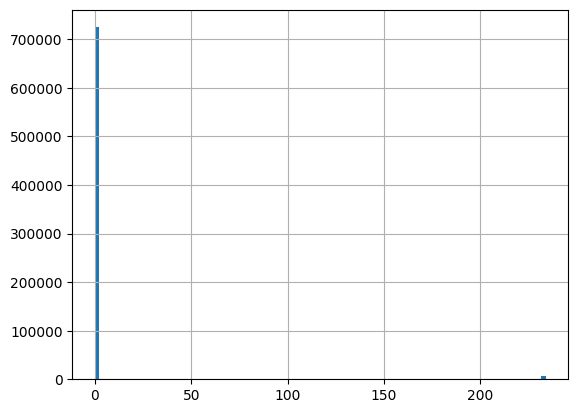

In [30]:
data['P1160_E'].hist(bins=100)

# Delete 0-var features

In [31]:
def remove_zero_var_features(data, target):
  new_data = data.copy()
  columns_to_delete = []
  for col in new_data.columns:
    if (col!=target) and (new_data[col].std() == 0):
      columns_to_delete.append(col)
  if len(columns_to_delete)==0:
    return new_data
  else:
    return new_data.drop(columns_to_delete, axis=1)

In [32]:
data.shape

(733271, 231)

In [33]:
data = remove_zero_var_features(data, target=target)

In [34]:
data.shape

(733271, 198)

In [35]:
# FOR CATBOOST (because its robust for different scale and missing values)
data_catboost = data.copy()

num_cols = data_catboost.select_dtypes(include=["float64", "int64"]).columns
data_catboost[num_cols] = data_catboost[num_cols].astype(np.float32)

In [36]:
print(data_catboost.dtypes.value_counts())
print(data_catboost.memory_usage(deep=True).sum() / 1024**2, "MB")


float32    198
Name: count, dtype: int64
553.8470878601074 MB


In [ ]:
data_catboost.to_csv('data_catboost_2.csv', index=False)

In [37]:
data

,P1110_B,P1110_E,P1150_B,P1150_E,P1160_B,P1160_E,P1170_B,P1170_E,P1180_B,P1180_E,...,equity_to_assets_ratio,debt_to_assets_ratio,current_ratio,quick_ratio,cash_ratio,roa,ros,roe,asset_turnover,receivables_turnover
0,8.0,7.0,402.0,398.0,0.0,0.0,115.0,96.0,0.0,0.0,...,0.999840,1.599335e-04,214.646405,110.000000,25.823455,0.018794,0.042590,0.018854,0.441273,5.015824
1,0.0,0.0,208809.0,205131.0,15.0,234.0,51974.5,62037.5,15662.2,20400.5,...,-0.793173,1.793173e+00,0.375169,0.015972,0.000496,-0.010284,-0.634614,0.012836,0.016206,0.433835
2,0.0,0.0,237.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022380,1.022380e+00,0.957550,0.553521,0.000000,-0.004554,NaN,0.223450,0.000000,0.000000
3,0.0,0.0,15428.0,15364.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.899575,1.004246e-01,1.658804,1.609435,1.349424,0.028035,0.079632,0.030861,0.352061,14.711785
4,0.0,0.0,339718.2,348946.0,0.0,0.0,51974.5,62037.5,0.0,0.0,...,0.538439,4.615614e-01,1.417109,0.247706,0.011042,0.004033,0.044474,0.007678,0.090684,0.815910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
733267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
733268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.000000e+00,3.500000,2.500000,2.500000,-0.571429,NaN,NaN,0.000000,NaN
733269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62037.5,0.0,0.0,...,0.999999,5.216827e-07,207.333333,110.000000,25.823455,-0.000046,NaN,-0.000046,0.000000,NaN


In [38]:
data_catboost

,P1110_B,P1110_E,P1150_B,P1150_E,P1160_B,P1160_E,P1170_B,P1170_E,P1180_B,P1180_E,...,equity_to_assets_ratio,debt_to_assets_ratio,current_ratio,quick_ratio,cash_ratio,roa,ros,roe,asset_turnover,receivables_turnover
0,8.0,7.0,402.0000,398.0,0.0,0.0,115.0,96.0,0.000000,0.0,...,0.999840,1.599335e-04,214.646408,110.000000,25.823456,0.018794,0.042590,0.018854,0.441273,5.015824
1,0.0,0.0,208809.0000,205131.0,15.0,234.0,51974.5,62037.5,15662.200195,20400.5,...,-0.793173,1.793174e+00,0.375169,0.015972,0.000496,-0.010284,-0.634614,0.012836,0.016206,0.433835
2,0.0,0.0,237.0000,237.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,-0.022380,1.022380e+00,0.957550,0.553521,0.000000,-0.004554,NaN,0.223450,0.000000,0.000000
3,0.0,0.0,15428.0000,15364.0,0.0,0.0,0.0,0.0,4.000000,0.0,...,0.899575,1.004246e-01,1.658804,1.609435,1.349424,0.028035,0.079632,0.030861,0.352061,14.711785
4,0.0,0.0,339718.1875,348946.0,0.0,0.0,51974.5,62037.5,0.000000,0.0,...,0.538439,4.615614e-01,1.417109,0.247706,0.011042,0.004033,0.044474,0.007678,0.090684,0.815910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
733267,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
733268,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,NaN,1.000000e+00,3.500000,2.500000,2.500000,-0.571429,NaN,NaN,0.000000,NaN
733269,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,62037.5,0.000000,0.0,...,0.999999,5.216827e-07,207.333328,110.000000,25.823456,-0.000046,NaN,-0.000046,0.000000,NaN


In [39]:
print(data_catboost.dtypes.value_counts())
print(data_catboost.memory_usage(deep=True).sum() / 1024**2, "MB")

float32    198
Name: count, dtype: int64
553.8470878601074 MB


# Filling missing values

In [40]:
def fill_features_misses(data, columns, filler='median'):
    data_new = data.copy()
    if filler=='median':
        for col in columns:
            print(col)
            data_new[col] = data_new[col].fillna(data_new[col].median())
            print(data_new[col].isna().sum())
    else:
        print('Incorrect filler')
    return data_new



In [41]:
data = fill_features_misses(data, financial_features, filler='median')

equity_to_assets_ratio
0
debt_to_assets_ratio
0
current_ratio
0
quick_ratio
0
cash_ratio
0
roa
0
ros
0
roe
0
asset_turnover
0
receivables_turnover
0


In [42]:
financial_features

['equity_to_assets_ratio',
 'debt_to_assets_ratio',
 'current_ratio',
 'quick_ratio',
 'cash_ratio',
 'roa',
 'ros',
 'roe',
 'asset_turnover',
 'receivables_turnover']

In [43]:
data.isna().sum().sort_values(ascending=False)

,0
P1110_B,0
P1110_E,0
P1150_B,0
P1150_E,0
P1160_B,0
...,...
roa,0
ros,0
roe,0
asset_turnover,0


In [44]:
data.isna().sum().sum()

np.int64(0)

# Standardization  

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
def standardize(data, columns, standardizer):
    new_data = data.copy()
    new_data[feature_columns] = ss.fit_transform(new_data[feature_columns])
    return new_data

In [47]:
feature_columns = [col for col in data.columns if col != target]

In [48]:
ss = StandardScaler()


data = standardize(data, feature_columns, ss)

In [49]:
data.head(3)

,P1110_B,P1110_E,P1150_B,P1150_E,P1160_B,P1160_E,P1170_B,P1170_E,P1180_B,P1180_E,...,equity_to_assets_ratio,debt_to_assets_ratio,current_ratio,quick_ratio,cash_ratio,roa,ros,roe,asset_turnover,receivables_turnover
0,-0.012244,-0.057112,-0.205241,-0.208002,-0.102202,-0.104136,-0.108940,-0.116238,-0.149480,-0.153153,...,0.479970,-0.522415,8.520372,8.379390,8.250955,-0.018367,0.128051,-0.115037,-0.267866,-0.201621
1,-0.140962,-0.139301,4.794759,4.303950,9.871095,9.804108,9.082533,9.060116,8.681676,8.626122,...,-0.490053,0.519104,-0.254099,-0.279236,-0.249950,-0.051747,-0.762547,-0.116467,-0.287509,-0.239723
2,-0.140962,-0.139301,-0.209200,-0.211550,-0.102202,-0.104136,-0.129322,-0.130460,-0.149480,-0.153153,...,-0.073053,0.071368,-0.230251,-0.236917,-0.250113,-0.045168,0.102558,-0.066387,-0.288258,-0.243331


In [50]:
# For SVM and Random Forest
data_svm_random_forest = data.copy()
num_cols = data_svm_random_forest.select_dtypes(include=["float64", "int64"]).columns
data_svm_random_forest[num_cols] = data_svm_random_forest[num_cols].astype(np.float32)

In [51]:
data.shape

(733271, 198)

In [52]:
print(data_svm_random_forest.dtypes.value_counts())
print(data_svm_random_forest.memory_usage(deep=True).sum() / 1024**2, "MB")

float32    198
Name: count, dtype: int64
553.8470878601074 MB


In [ ]:
data_svm_random_forest.to_csv('data_svm_random_forest.csv', index=False)

In [53]:
data_svm_random_forest.shape

(733271, 198)

# Eliminating multicollinearity

In [54]:
def deltas_corr_with_original(data):
    for code in code_to_name:
        if f'P{code}_delta_abs' in data.columns and f'P{code}_delta_rel' in data.columns:
          print('-'*20)
          print(f'Feature: P{code}_delta_abs')
          corr_B = get_round_corr(data[f'P{code}_B'], data[f'P{code}_delta_abs'])
          corr_E = get_round_corr(data[f'P{code}_E'], data[f'P{code}_delta_abs'])
          print(f'Correlation with P{code}_B : {corr_B}')
          print(f'Correlation with P{code}_E : {corr_E}')
          if abs(corr_B) > 0.9:
              print('⚠️  High correlaltion level with original ! ⚠️ ')
          print()
          print(f'Feature: P{code}_delta_rel')
          corr_B = get_round_corr(data[f'P{code}_B'], data[f'P{code}_delta_rel'])
          corr_E = get_round_corr(data[f'P{code}_E'], data[f'P{code}_delta_rel'])
          print(f'Correlation with P{code}_B : {corr_B}')
          print(f'Correlation with P{code}_E : {corr_E}')
          if abs(corr_B) > 0.9:
              print('!!!  High correlaltion level with original! ⚠️')
          print('-'*20)

In [55]:
deltas_corr_with_original(data)

--------------------
Feature: P1110_delta_abs
Correlation with P1110_B : -0.368
Correlation with P1110_E : -0.062

Feature: P1110_delta_rel
Correlation with P1110_B : -0.378
Correlation with P1110_E : -0.212
--------------------
--------------------
Feature: P1150_delta_abs
Correlation with P1150_B : 0.128
Correlation with P1150_E : 0.331

Feature: P1150_delta_rel
Correlation with P1150_B : -0.002
Correlation with P1150_E : 0.082
--------------------
--------------------
Feature: P1170_delta_abs
Correlation with P1170_B : 0.19
Correlation with P1170_E : 0.44

Feature: P1170_delta_rel
Correlation with P1170_B : -0.26
Correlation with P1170_E : -0.101
--------------------
--------------------
Feature: P1180_delta_abs
Correlation with P1180_B : 0.509
Correlation with P1180_E : 0.703

Feature: P1180_delta_rel
Correlation with P1180_B : 0.107
Correlation with P1180_E : 0.257
--------------------
--------------------
Feature: P1190_delta_abs
Correlation with P1190_B : 0.193
Correlation with 

In [56]:
def deltas_corr_with_target(data):
    for code in code_to_name:
        if f'P{code}_delta_abs' in data.columns and f'P{code}_delta_rel' in data.columns:
          print('-'*20)
          print(f'Feature: P{code}_delta_abs')
          target_corr_abs = get_round_corr(data[f'P{code}_delta_abs'], data[target])
          print(f'Correlation with target: {target_corr_abs}')
          print()
          print(f'Feature: P{code}_delta_rel')
          target_corr_rel = get_round_corr(data[f'P{code}_delta_rel'], data[target])
          print(f'Correlation with target: {target_corr_rel}')
          print('-'*20)

In [57]:
deltas_corr_with_target(data)

--------------------
Feature: P1110_delta_abs
Correlation with target: -0.016

Feature: P1110_delta_rel
Correlation with target: -0.017
--------------------
--------------------
Feature: P1150_delta_abs
Correlation with target: -0.025

Feature: P1150_delta_rel
Correlation with target: -0.019
--------------------
--------------------
Feature: P1170_delta_abs
Correlation with target: -0.002

Feature: P1170_delta_rel
Correlation with target: -0.019
--------------------
--------------------
Feature: P1180_delta_abs
Correlation with target: 0.055

Feature: P1180_delta_rel
Correlation with target: 0.021
--------------------
--------------------
Feature: P1190_delta_abs
Correlation with target: -0.002

Feature: P1190_delta_rel
Correlation with target: -0.018
--------------------
--------------------
Feature: P1100_delta_abs
Correlation with target: -0.011

Feature: P1100_delta_rel
Correlation with target: -0.005
--------------------
--------------------
Feature: P1210_delta_abs
Correlation wi

In [58]:
def fin_features_target_corr(data, fin_features):
    for feature in fin_features:
        print('-'*20)
        print(f'Feature: {feature}')
        print(f'corr with target: {get_round_corr(data[feature], data[target])}')

In [59]:
fin_features_target_corr(data, financial_features)

--------------------
Feature: equity_to_assets_ratio
corr with target: -0.039
--------------------
Feature: debt_to_assets_ratio
corr with target: 0.04
--------------------
Feature: current_ratio
corr with target: -0.011
--------------------
Feature: quick_ratio
corr with target: -0.012
--------------------
Feature: cash_ratio
corr with target: -0.015
--------------------
Feature: roa
corr with target: -0.02
--------------------
Feature: ros
corr with target: -0.065
--------------------
Feature: roe
corr with target: -0.001
--------------------
Feature: asset_turnover
corr with target: -0.013
--------------------
Feature: receivables_turnover
corr with target: -0.012


In [60]:
data.isna().sum().sum()

np.int64(0)

In [61]:
corr = data.corr()

In [62]:
def compute_mean_feature_collinearity(data, target='BANKR'):
  features = [c for c in data.columns if c != target]

  corr = data.corr().apply(abs)


  corr_df = pd.DataFrame({'index': features})
  corr_df = corr_df.set_index('index')
  mean_corr = []
  max_corr = []
  strong_frac = []
  for col in features:

      mean_corr.append(corr[col].drop(col).drop(target).sum() / (len(features) - 1))
      max_corr.append(max(corr[col].drop(col).drop(target)))
      strong_frac.append((corr[col].drop(col).drop(target)>0.8).sum()/(len(features)-1))

  corr_df['mean_corr'] = mean_corr
  corr_df['max_corr'] = max_corr
  corr_df['strong_frac'] = strong_frac
  corr_df['score'] = 0.3 * corr_df['mean_corr'] + 0.4 * corr_df['max_corr'] + 0.3 * corr_df['strong_frac']

  return corr_df

In [63]:
corr['P1100_B'].drop('P1100_B').max()

0.9402112792455591

In [64]:
stat_feature_corr = compute_mean_feature_collinearity(data, target=target)

In [65]:
stat_feature_corr.sort_values(by='score')

,mean_corr,max_corr,strong_frac,score
index,,,,
P1210_delta_rel,0.028330,0.181277,0.000000,0.081010
P1250_delta_rel,0.030939,0.209312,0.000000,0.093006
P2421_delta_rel,0.044410,0.201594,0.000000,0.093961
P2340_delta_rel,0.035677,0.240592,0.000000,0.106940
ros,0.038837,0.238677,0.000000,0.107122
...,...,...,...,...
P2110_E,0.273686,0.982276,0.015306,0.479608
P1700_B,0.295808,0.998899,0.035714,0.499016
P1600_B,0.295915,0.998899,0.040816,0.500579


In [66]:
stat_feature_corr.mean_corr.corr(stat_feature_corr.max_corr)

np.float64(0.6666172382172827)

In [67]:
def delete_mulitcoll_features(data, stat_feature_corr, n, target='BANKR'):
  stat_feature_corr = stat_feature_corr.sort_values(by='score', ascending=True)
  selected = stat_feature_corr.index[:n].to_list()

  if target not in selected:
    selected.append(target)

  return data[selected]


In [70]:
data_lin_reg = delete_mulitcoll_features(data, stat_feature_corr, 120).copy()

In [73]:
num_cols = data_lin_reg.select_dtypes(include=["float64", "int64"]).columns
data_lin_reg[num_cols] = data_lin_reg[num_cols].astype(np.float32)

In [74]:
data_lin_reg.to_csv('data_lin_reg_2.csv', index=False)

In [72]:
data_lin_reg.BANKR

,BANKR
0,0
1,0
2,0
3,0
4,0
...,...
733266,0
733267,0
733268,0
733269,0


# test

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.read_csv('drive/MyDrive/data_lin_reg.csv')

,P1210_delta_rel,P1250_delta_rel,P2421_delta_rel,P2340_delta_rel,ros,P2350_delta_rel,roe,P1170_delta_rel,roa,P1510_delta_rel,...,P2430_E,P1370_delta_abs,P1410_delta_abs,P1190_B,P1190_E,P1510_B,P1170_B,P1510_E,P1170_E,P1400_delta_abs
0,-0.168394,-0.212418,-1.303590,-0.261323,0.128051,-0.206938,-0.115037,-3.253842,-0.018367,-0.113410,...,-0.143290,-0.408662,-0.069578,-0.132819,-0.133573,-0.197569,-0.108940,-0.200945,-0.116238,-0.078403
1,-0.168645,-0.129091,-0.043760,-0.268387,-0.762547,-0.291988,-0.116467,0.117403,-0.051747,-0.113410,...,-0.143290,-1.849906,-0.069578,-0.132819,-0.133573,8.099054,9.082533,8.059673,9.060116,-0.075274
2,-0.168394,-0.203194,-0.043760,-0.268387,0.102558,-0.258198,-0.066387,0.117403,-0.045168,-0.056797,...,-0.143290,-0.216213,-0.069578,-0.132819,-0.133573,0.481804,-0.129322,0.492130,-0.130460,-0.078403
3,-0.168394,-0.174597,-0.043760,-0.153002,0.176766,-0.282788,-0.112181,0.117403,-0.007758,-0.113410,...,0.020635,-0.025835,-0.069578,-0.132819,-0.133573,-0.197569,-0.129322,-0.200945,-0.130460,-0.075649
4,-0.168509,-0.210377,-0.382829,-0.258568,0.130529,-0.282417,-0.117694,-0.856441,-0.035311,-0.487564,...,-0.061328,0.670669,-4.049932,9.017342,8.997222,0.061520,9.082533,-0.102998,9.060116,-3.875231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,-0.168394,-0.203194,-0.043760,-0.153002,0.102558,-0.198774,-0.119520,0.117403,-0.039941,-0.113410,...,-0.143290,-0.077227,-0.069578,-0.132819,-0.133573,-0.197569,-0.129322,-0.200945,-0.130460,-0.078403
733267,-0.168394,-0.203194,-0.043760,-0.153002,0.102558,-0.198774,-0.119520,0.117403,-0.039941,-0.113410,...,-0.143290,-0.077227,-0.069578,-0.132819,-0.133573,-0.197569,-0.129322,-0.200945,-0.130460,-0.078403
733268,-0.168394,-0.203194,-0.043760,-0.153002,0.102558,-0.198774,-0.105777,0.117403,-0.695912,-0.113410,...,-0.143290,-0.077227,-0.069578,-0.132819,-0.133573,-0.197569,-0.129322,-0.200945,-0.130460,-0.078403
733269,-0.168394,-0.203194,-0.043760,-0.153002,0.102558,-0.198774,-0.119531,0.117403,-0.039994,-0.113410,...,-0.143290,-0.090248,-0.069578,-0.132819,-0.133573,-0.197569,-0.129322,-0.200945,9.060116,-0.078403


In [ ]:
pd.read_csv('drive/MyDrive/train.csv')

,ID_FIRM,P1110_B,P1110_E,P1120_B,P1120_E,P1130_B,P1130_E,P1140_B,P1140_E,P1150_B,...,P2421_E,P2430_B,P2430_E,P2450_B,P2450_E,P2460_B,P2460_E,P2400_B,P2400_E,BANKR
0,1,8,7,0,0,0,0,0,0,402,...,161,0,0,0,0,0,0,1561,621,0
1,2,0,0,3318,3318,0,0,0,0,208809,...,0,0,0,0,0,0,8551,-15296,-16123,0
2,3,0,0,0,0,0,0,0,0,237,...,0,0,0,0,0,6,0,-2166,-1375,0
3,4,0,0,0,0,0,0,0,0,15428,...,-55,0,22,0,4,0,0,-3390,502,0
4,5,0,0,0,0,0,0,0,0,340249,...,-895,0,11,0,0,105,0,26131,6100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,733267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733267,733268,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733268,733269,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-4,0
733269,733270,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56,0,-132,0


In [ ]:
pd.read_csv('drive/MyDrive/data_svm_random_forest.csv')

,P1110_B,P1110_E,P1150_B,P1150_E,P1160_B,P1160_E,P1170_B,P1170_E,P1180_B,P1180_E,...,equity_to_assets_ratio,debt_to_assets_ratio,current_ratio,quick_ratio,cash_ratio,roa,ros,roe,asset_turnover,receivables_turnover
0,-0.012244,-0.057112,-0.205241,-0.208002,-0.102202,-0.104136,-0.108940,-0.116238,-0.149480,-0.153153,...,0.479970,-0.522415,8.520371,8.379391,8.250955,-0.018367,0.128051,-0.115037,-0.267866,-0.201621
1,-0.140962,-0.139301,4.794759,4.303950,9.871095,9.804108,9.082533,9.060116,8.681677,8.626122,...,-0.490053,0.519104,-0.254099,-0.279236,-0.249950,-0.051747,-0.762547,-0.116467,-0.287509,-0.239723
2,-0.140962,-0.139301,-0.209200,-0.211550,-0.102202,-0.104136,-0.129322,-0.130460,-0.149480,-0.153153,...,-0.073053,0.071368,-0.230251,-0.236917,-0.250113,-0.045168,0.102558,-0.066387,-0.288258,-0.243331
3,-0.140962,-0.139301,0.155255,0.121822,-0.102202,-0.104136,-0.129322,-0.130460,-0.147225,-0.153153,...,0.425727,-0.464174,-0.201534,-0.153789,0.194117,-0.007758,0.176766,-0.112181,-0.271989,-0.120991
4,-0.140962,-0.139301,7.935469,7.473377,-0.102202,-0.104136,9.082533,9.060116,-0.149480,-0.153153,...,0.230351,-0.254398,-0.211432,-0.260993,-0.246478,-0.035311,0.130529,-0.117694,-0.284067,-0.236546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733266,-0.140962,-0.139301,-0.214886,-0.216773,-0.102202,-0.104136,-0.129322,-0.130460,-0.149480,-0.153153,...,0.480057,-0.522508,-0.219218,-0.211520,-0.235081,-0.039941,0.102558,-0.119520,-0.288258,-0.243331
733267,-0.140962,-0.139301,-0.214886,-0.216773,-0.102202,-0.104136,-0.129322,-0.130460,-0.149480,-0.153153,...,0.480057,-0.522508,-0.219218,-0.211520,-0.235081,-0.039941,0.102558,-0.119520,-0.288258,-0.243331
733268,-0.140962,-0.139301,-0.214886,-0.216773,-0.102202,-0.104136,-0.129322,-0.130460,-0.149480,-0.153153,...,0.115086,0.058368,-0.126137,-0.083678,0.572886,-0.695912,0.102558,-0.105777,-0.288258,-0.207931
733269,-0.140962,-0.139301,-0.214886,-0.216773,-0.102202,-0.104136,-0.129322,9.060116,-0.149480,-0.153153,...,0.480056,-0.522508,8.220900,8.379391,8.250955,-0.039994,0.102558,-0.119531,-0.288258,-0.207931
